# Example of a Machine Learning application on a meteorological dataset 

#### First thing: create your environment with Python and the most important libraries

 Instructions at https://docs.python.org/3/tutorial/venv.html
 
 Modules to install:
 
 pip3 install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn
 pip3 install seaborn

#### Importing python libraries in the jupyter notebook and loading data

In [1]:
from pandas.plotting import scatter_matrix
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Data are stored in the data/ folder in the same directory of the notebook
DATA_PATH="./data/"

In [3]:
def load_data(path=DATA_PATH):
    csv_file_1 = os.path.join(path,"1/2023_03_30_1128_data.csv")
    csv_file_2 = os.path.join(path,"1/2023_03_30_1139_data.csv")
    df_merged = pd.read_csv(csv_file_1).merge(pd.read_csv(csv_file_2), how='outer')
    return df_merged

In [4]:
dataset = load_data()
dataset.head()
#dataset.shape

,Date [UTC],Time [UTC],Illuminance [lux],Temperature [°C],Humidity [%],CO2 [ppm],TVOC [ppb],Latitude [°],Longitude [°],Satellites [-],Speed [m/s],Altitude [m],Roll [°],Pitch [°],Heading [°],Wind speed [m/s],Wind angle [°],Wind temp. [°C]
0,2023-03-30,11:31:07.191,245.02,15.14,51.14,472,9,46.520954,6.563142,10,0.01,428.8,0.1,1.5,3.0,0.6,44,17
1,2023-03-30,11:31:08.295,245.02,15.13,51.15,463,16,46.520954,6.563143,10,0.00,428.8,0.2,1.3,3.1,0.3,68,17
2,2023-03-30,11:31:09.399,231.85,15.15,51.17,444,12,46.520954,6.563143,10,0.01,428.9,0.3,1.4,3.0,0.4,63,17
3,2023-03-30,11:31:10.504,235.82,15.13,51.26,429,1,46.520954,6.563145,10,0.01,428.9,0.2,1.3,3.3,0.4,24,17
4,2023-03-30,11:31:11.612,240.67,15.13,51.25,417,0,46.520954,6.563145,10,0.01,429.0,0.3,1.3,3.2,0.6,17,17


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date [UTC]          1427 non-null   object 
 1    Time [UTC]         1427 non-null   object 
 2    Illuminance [lux]  1427 non-null   float64
 3    Temperature [°C]   1427 non-null   float64
 4    Humidity [%]       1427 non-null   float64
 5    CO2 [ppm]          1427 non-null   int64  
 6    TVOC [ppb]         1427 non-null   int64  
 7    Latitude [°]       1427 non-null   float64
 8    Longitude [°]      1427 non-null   float64
 9    Satellites [-]     1427 non-null   int64  
 10   Speed [m/s]        1427 non-null   float64
 11   Altitude [m]       1427 non-null   float64
 12   Roll [°]           1427 non-null   float64
 13   Pitch [°]          1427 non-null   float64
 14   Heading [°]        1427 non-null   float64
 15   Wind speed [m/s]   1427 non-null   float64
 16   Wind 

#### Plotting the variables contained in the dataset

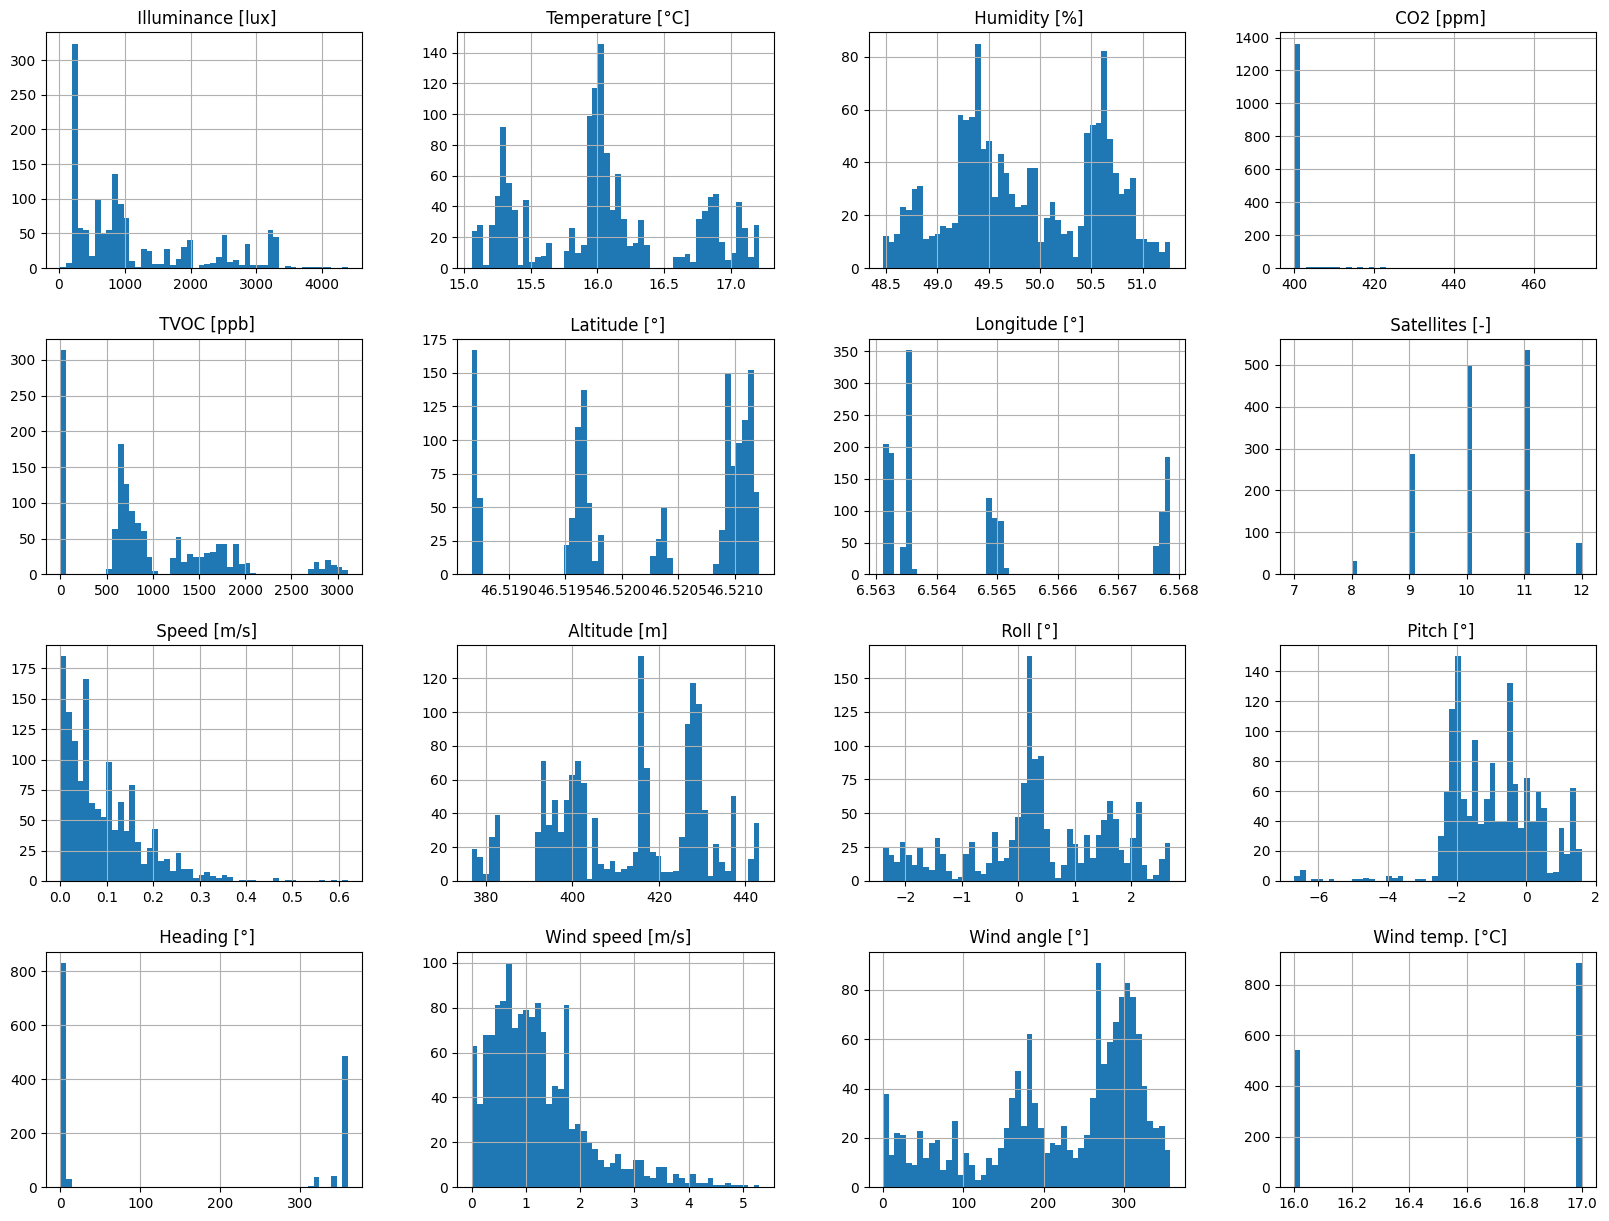

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

#### Renaming the columns for a better handling (removing parenthesis and special symbols)

In [7]:
dataset.rename(columns={"Date [UTC]":"Date_UTC",
                        " Time [UTC]":"Time_UTC",
                        " Illuminance [lux]":"Illuminance_lux",
                        " Temperature [°C]":"Temperature_C",
                        " Humidity [%]":"Humidity_perc",
                        " CO2 [ppm]":"CO2_ppm",
                        " TVOC [ppb]":"TVOC_ppb",
                        " Latitude [°]":"Latitude_deg",
                        " Longitude [°]":"Longitude_deg",
                        " Satellites [-]":"Satellite",
                        " Speed [m/s]":"Speed_ms",
                        " Altitude [m]":"Altitude_m",
                        " Roll [°]":"Roll_deg",
                        " Pitch [°]":"Pitch_deg",
                        " Heading [°]":"Heading_deg",
                        " Wind speed [m/s]":"Windspeed_ms",
                        " Wind angle [°]":"Windangle_deg",
                        " Wind temp. [°C]":"Windtemp_C"}, inplace=True)

In [8]:
dataset.head()

,Date_UTC,Time_UTC,Illuminance_lux,Temperature_C,Humidity_perc,CO2_ppm,TVOC_ppb,Latitude_deg,Longitude_deg,Satellite,Speed_ms,Altitude_m,Roll_deg,Pitch_deg,Heading_deg,Windspeed_ms,Windangle_deg,Windtemp_C
0,2023-03-30,11:31:07.191,245.02,15.14,51.14,472,9,46.520954,6.563142,10,0.01,428.8,0.1,1.5,3.0,0.6,44,17
1,2023-03-30,11:31:08.295,245.02,15.13,51.15,463,16,46.520954,6.563143,10,0.00,428.8,0.2,1.3,3.1,0.3,68,17
2,2023-03-30,11:31:09.399,231.85,15.15,51.17,444,12,46.520954,6.563143,10,0.01,428.9,0.3,1.4,3.0,0.4,63,17
3,2023-03-30,11:31:10.504,235.82,15.13,51.26,429,1,46.520954,6.563145,10,0.01,428.9,0.2,1.3,3.3,0.4,24,17
4,2023-03-30,11:31:11.612,240.67,15.13,51.25,417,0,46.520954,6.563145,10,0.01,429.0,0.3,1.3,3.2,0.6,17,17


In [9]:
## Group by 23 time stamps to facilitate the visualisation
tmp_dataset = (dataset.drop(columns=['Date_UTC', 'Time_UTC'])).groupby(dataset.index//23).mean()

In [10]:
tmp_dataset

,Illuminance_lux,Temperature_C,Humidity_perc,CO2_ppm,TVOC_ppb,Latitude_deg,Longitude_deg,Satellite,Speed_ms,Altitude_m,Roll_deg,Pitch_deg,Heading_deg,Windspeed_ms,Windangle_deg,Windtemp_C
0,247.518261,15.119565,51.105652,419.347826,2.826087,46.520948,6.563144,10.000000,0.022174,429.017391,0.195652,1.147826,3.139130,1.034783,206.782609,17.0
1,256.857391,15.096087,50.881304,412.000000,4.130435,46.520962,6.563134,10.000000,0.084348,428.591304,0.200000,1.095652,3.200000,0.960870,285.826087,17.0
2,219.023478,15.189565,50.938696,408.130435,2.956522,46.520960,6.563148,9.913043,0.143043,428.447826,0.278261,0.421739,4.286957,0.795652,245.695652,17.0
3,200.736087,15.227391,50.739565,403.347826,4.956522,46.520912,6.563132,10.000000,0.187391,428.030435,0.313043,0.186957,4.717391,0.717391,268.956522,17.0
4,199.759130,15.243478,50.742609,400.739130,3.652174,46.520875,6.563121,10.000000,0.153478,427.465217,0.243478,-0.239130,4.630435,0.882609,68.260870,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1813.261304,16.666522,49.462609,400.000000,681.869565,46.520402,6.567677,11.956522,0.079565,382.243478,-1.573913,-1.213043,1.582609,0.943478,181.608696,17.0
59,1014.899130,16.790870,49.502609,400.000000,746.913043,46.520359,6.567653,11.913043,0.024783,382.543478,-1.921739,-0.830435,16.300000,0.308696,193.347826,17.0
60,289.193478,17.109565,49.869565,400.000000,810.173913,46.520304,6.567683,10.173913,0.130870,377.834783,-1.434783,1.047826,339.834783,0.226087,146.782609,17.0
61,234.125652,17.180435,49.478696,400.000000,797.260870,46.520341,6.567693,10.739130,0.074348,379.547826,-1.373913,1.104348,355.321739,0.373913,285.130435,17.0


### Looking for (linear) correlations between the target (illuminance) and the features

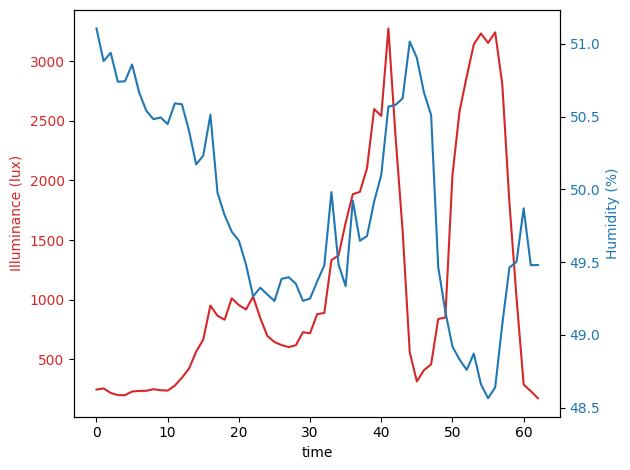

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Illuminance (lux)', color=color)
ax1.plot(tmp_dataset.index, tmp_dataset.Illuminance_lux, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(tmp_dataset.index, tmp_dataset.Humidity_perc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

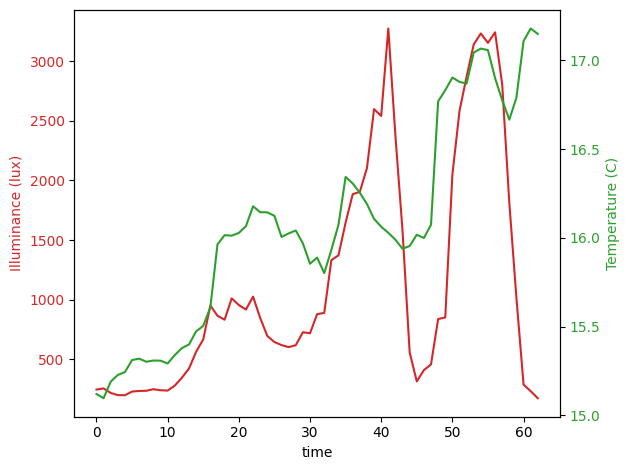

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Illuminance (lux)', color=color)
ax1.plot(tmp_dataset.index, tmp_dataset.Illuminance_lux, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (C)', color=color)  # we already handled the x-label with ax1
ax2.plot(tmp_dataset.index, tmp_dataset.Temperature_C, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

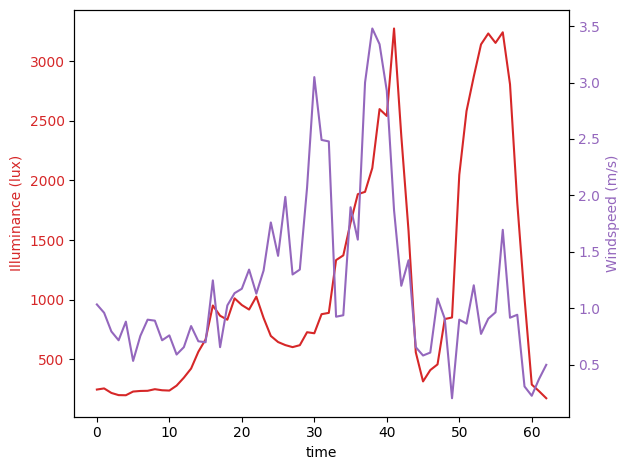

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Illuminance (lux)', color=color)
ax1.plot(tmp_dataset.index, tmp_dataset.Illuminance_lux, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('Windspeed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(tmp_dataset.index, tmp_dataset.Windspeed_ms, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [14]:
## Dropping the timestamps for the moment, not considering them as features for this exercise
dataset.drop(columns=['Date_UTC', 'Time_UTC'])

,Illuminance_lux,Temperature_C,Humidity_perc,CO2_ppm,TVOC_ppb,Latitude_deg,Longitude_deg,Satellite,Speed_ms,Altitude_m,Roll_deg,Pitch_deg,Heading_deg,Windspeed_ms,Windangle_deg,Windtemp_C
0,245.02,15.14,51.14,472,9,46.520954,6.563142,10,0.01,428.8,0.1,1.5,3.0,0.6,44,17
1,245.02,15.13,51.15,463,16,46.520954,6.563143,10,0.00,428.8,0.2,1.3,3.1,0.3,68,17
2,231.85,15.15,51.17,444,12,46.520954,6.563143,10,0.01,428.9,0.3,1.4,3.0,0.4,63,17
3,235.82,15.13,51.26,429,1,46.520954,6.563145,10,0.01,428.9,0.2,1.3,3.3,0.4,24,17
4,240.67,15.13,51.25,417,0,46.520954,6.563145,10,0.01,429.0,0.3,1.3,3.2,0.6,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,225.32,17.18,49.49,400,800,46.520386,6.567688,11,0.08,381.1,-1.4,1.3,355.4,0.5,291,17
1423,225.22,17.15,49.46,400,784,46.520386,6.567687,11,0.14,381.1,-1.4,0.8,354.9,0.7,269,17
1424,214.23,17.17,49.54,400,832,46.520393,6.567688,11,0.06,381.1,-1.4,1.2,355.7,0.5,298,17
1425,204.98,17.20,49.44,400,804,46.520393,6.567687,11,0.09,381.1,-1.4,1.2,355.7,0.5,298,17


<Axes: >

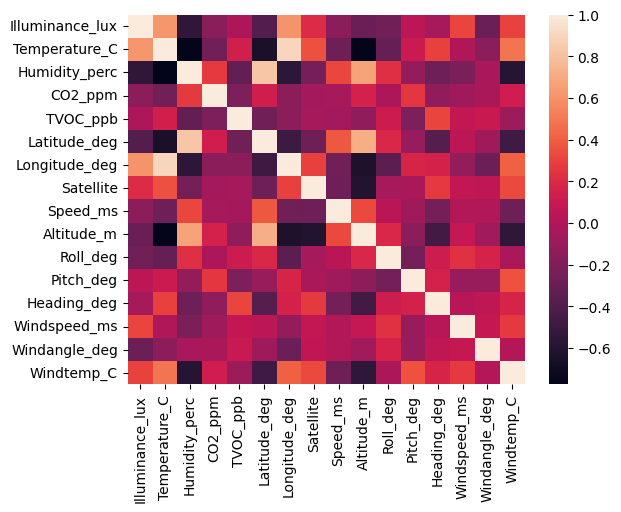

In [15]:
corr_matrix=(dataset.drop(columns=['Date_UTC', 'Time_UTC'])).corr()
#scatter_matrix(dataset, figsize=(12,8))
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

In [16]:
## Positively correlated pairs
[f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}" for i, j in zip(*np.where((corr_matrix.values) > 0.6)) if i < j]


['Illuminance_lux and Temperature_C',
 'Illuminance_lux and Longitude_deg',
 'Temperature_C and Longitude_deg',
 'Humidity_perc and Latitude_deg',
 'Humidity_perc and Altitude_m',
 'Latitude_deg and Altitude_m']

In [17]:
## Negatively correlated pairs
[f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}" for i, j in zip(*np.where((corr_matrix.values) < -0.6)) if i < j]


['Temperature_C and Humidity_perc',
 'Temperature_C and Latitude_deg',
 'Temperature_C and Altitude_m',
 'Longitude_deg and Altitude_m',
 'Satellite and Altitude_m']

### Predict the Illuminance based on the other features

In [18]:
## Pruned dataset
pr_dataset = dataset.drop(columns=['Date_UTC', 'Time_UTC'])

In [19]:
# Splitting training and test set (80% vs 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pr_dataset.drop('Illuminance_lux',axis=1), pr_dataset.Illuminance_lux,test_size=0.2)


### LINEAR REGRESSION

In [20]:
## Linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [21]:
model_lin = lin_reg.fit(X_train,y_train)

In [22]:
## Model performance (score() indicates the R2 or  coefficient of determination, or R², for the data passed.
## The higher the R² value, the better the fit. In this case, the training data yields a slightly higher coefficient. 
## The R² calculated with test data is an unbiased measure of your model’s prediction performance. )
print(model_lin.score(X_train, y_train))
print(model_lin.score(X_test, y_test))

0.6768613271214418
0.6002704583373792


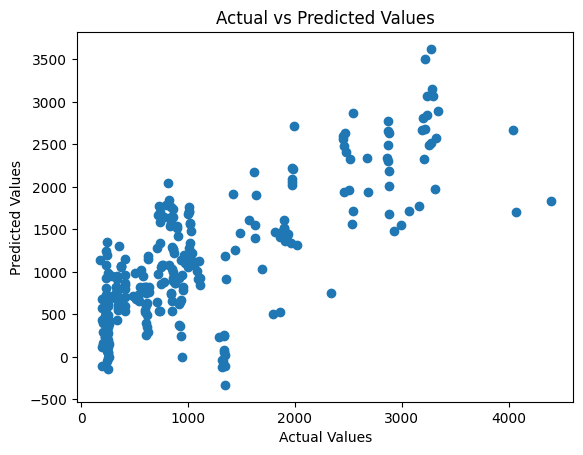

In [23]:
y_pred = model_lin.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)

In [25]:
model_rf = rf_reg.fit(X_train, y_train)

In [26]:
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test))

0.9964260401842677
0.980113388726833


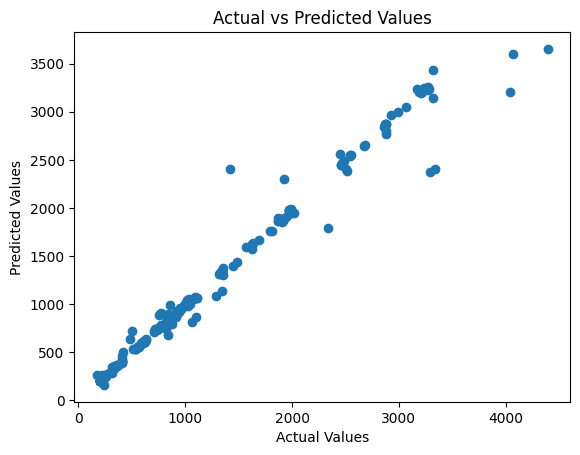

In [27]:
y_pred = model_rf.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Measuring features importance

In [28]:
feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Humidity_perc    4.801209e-01
TVOC_ppb         2.246602e-01
Longitude_deg    1.294915e-01
Temperature_C    5.284184e-02
Pitch_deg        4.003695e-02
Altitude_m       3.656229e-02
Heading_deg      8.408709e-03
Roll_deg         7.745848e-03
Windspeed_ms     7.367114e-03
Latitude_deg     6.140992e-03
Speed_ms         4.874835e-03
Windangle_deg    9.444222e-04
Windtemp_C       5.381007e-04
Satellite        2.662867e-04
CO2_ppm          7.443773e-08
dtype: float64

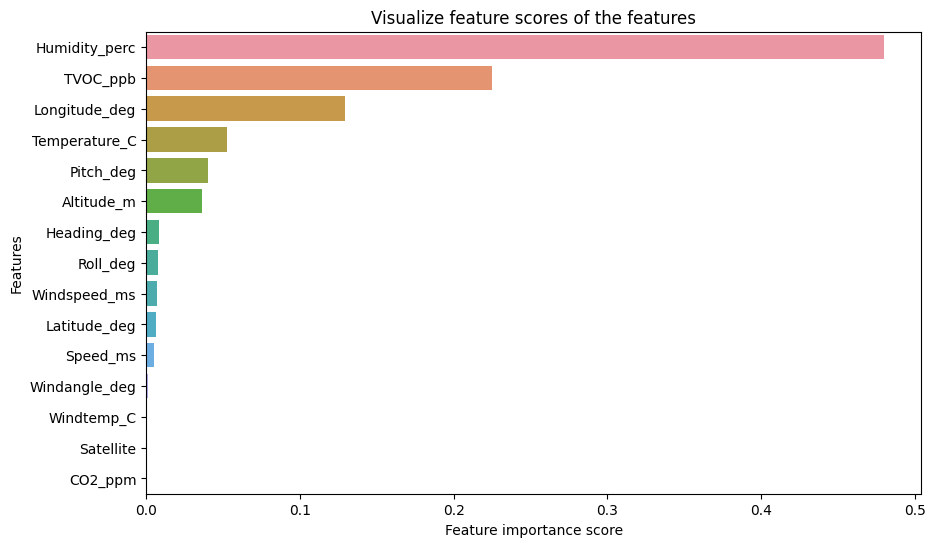

In [29]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Applying a random search on a set of gridded values to optimize the RF hyperparameters

In [30]:
## Random Search: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd

In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/Roberto/tutorial_courses/tutorial_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
## Printing the best parameters
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.2f} lux.'.format(np.mean(errors)))
    print('MAPE = {:0.2f}%.'.format(mape))
    
    return accuracy

print("Linear regression")
linear_accuracy = evaluate(model_lin, X_test, y_test)
print("----------------")
print("Random Forest not optimized")
base_accuracy = evaluate(model_rf, X_test, y_test)
print("----------------")
print("Random Forest after Grid search")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Linear regression
Model Performance
Average Error: 445.98 lux.
MAPE = 65.39%.
----------------
Random Forest not optimized
Model Performance
Average Error: 41.02 lux.
MAPE = 3.27%.
----------------
Random Forest after Grid search
Model Performance
Average Error: 42.72 lux.
MAPE = 3.27%.


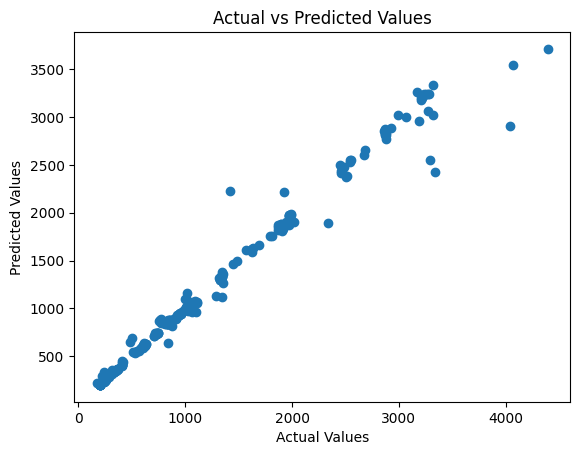

In [35]:
y_pred = best_random.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Measuring features importance (after optimization of the hyperparameters)

In [36]:
feature_scores = pd.Series(best_random.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Humidity_perc    0.187408
TVOC_ppb         0.155459
Longitude_deg    0.136364
Latitude_deg     0.125493
Temperature_C    0.097927
Altitude_m       0.070485
Roll_deg         0.048781
Heading_deg      0.044093
Windangle_deg    0.040492
Windspeed_ms     0.036237
Pitch_deg        0.034637
Satellite        0.009986
Windtemp_C       0.009326
Speed_ms         0.002914
CO2_ppm          0.000400
dtype: float64

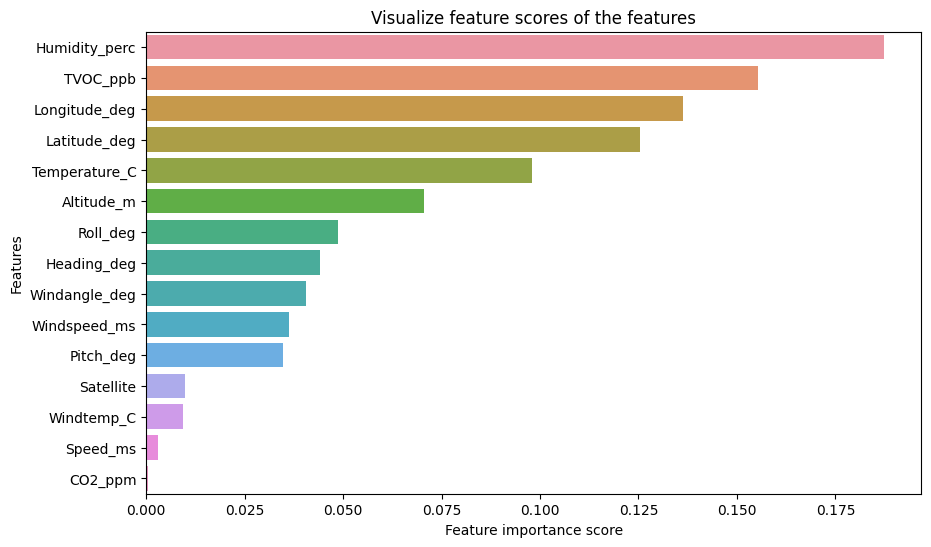

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  12.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=  15.7s
[CV] END bootstrap=True, max_depth=N

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  13.9s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  14.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   6.9s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  14.3s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  12.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   5.1s
[CV] END bootstrap=True, max_depth=20

In [37]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()